# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cvxopt import matrix,solvers

### Read csv files containing extracted features from flower images

In [2]:
roses = pd.read_csv('rose_features.csv')
chrysanthemums = pd.read_csv('chrysanthemum_features.csv')
butterfly_pea = pd.read_csv('butterflypea_features.csv')

## Main Support Vector Machine Algorithm

In [3]:
def SVM(class1,class2,index):
    line = class1.append(class2,ignore_index=True).drop(columns='Unnamed: 0')
    
    features = np.zeros((len(line),2))
    features[:,0] = line['r']
    features[:,1] = line['eccentricity']
    
    z = np.zeros((len(line),1))
    z[:len(class1)] = 1.0
    z[len(class1):] = -1.0
    
    H = matrix((features@features.T)*(z@z.T))
    f = matrix(-np.ones(len(line)))
    
    A = matrix(-np.identity(len(line)))
    a = matrix(np.zeros(len(line)))
    
    b = matrix(0.0)
    B = matrix(z,(1,len(line)))
    sol = solvers.qp(H,f,A,a,B,b)
    
    alpha = np.round(np.array(sol['x']).flatten())
    alpha_index = np.where(alpha>0)[0]
    
    w = ((alpha*z.T)@features)[0]
    w0 = (1/z[np.int(alpha_index[index])]) - (w.T@features[np.int(alpha_index[index])])
    
    A = w[0]
    B = w[1]
    C = -w0

    m = -A/B
    b = C/B
    
    return m,b

### Calculate decision line between roses and chrysanthemums

In [4]:
index1 = 0
m1,b1 = SVM(chrysanthemums,roses,index1)

     pcost       dcost       gap    pres   dres
 0: -1.6602e+01 -4.3811e+01  3e+01  2e-15  2e+00
 1: -2.3192e+01 -3.2417e+01  9e+00  2e-15  8e-01
 2: -4.0096e+01 -5.2404e+01  1e+01  3e-15  6e-01
 3: -5.7866e+01 -7.2033e+01  1e+01  9e-15  4e-01
 4: -6.8499e+01 -7.2633e+01  4e+00  1e-14  7e-02
 5: -6.9148e+01 -6.9482e+01  3e-01  1e-14  5e-03
 6: -6.9338e+01 -6.9366e+01  3e-02  4e-14  3e-04
 7: -6.9351e+01 -6.9351e+01  3e-04  2e-14  3e-06
 8: -6.9351e+01 -6.9351e+01  3e-06  2e-14  3e-08
Optimal solution found.


### Calculate decision line between butterfly peas and chrysanthemums

In [5]:
index2 = 0
m2,b2 = SVM(chrysanthemums,butterfly_pea,index2)

     pcost       dcost       gap    pres   dres
 0: -1.4792e+01 -4.2970e+01  1e+02  8e+00  2e+00
 1: -2.2620e+01 -5.1251e+01  5e+01  3e+00  8e-01
 2: -4.0036e+01 -7.1383e+01  4e+01  2e+00  4e-01
 3: -5.5802e+01 -6.8182e+01  1e+01  3e-01  8e-02
 4: -6.5601e+01 -6.8389e+01  3e+00  2e-02  5e-03
 5: -6.7494e+01 -6.7620e+01  1e-01  4e-04  1e-04
 6: -6.7603e+01 -6.7604e+01  2e-03  4e-06  1e-06
 7: -6.7604e+01 -6.7604e+01  2e-05  4e-08  1e-08
Optimal solution found.


## Plot of decision lines with scatterplot of flower datapoints

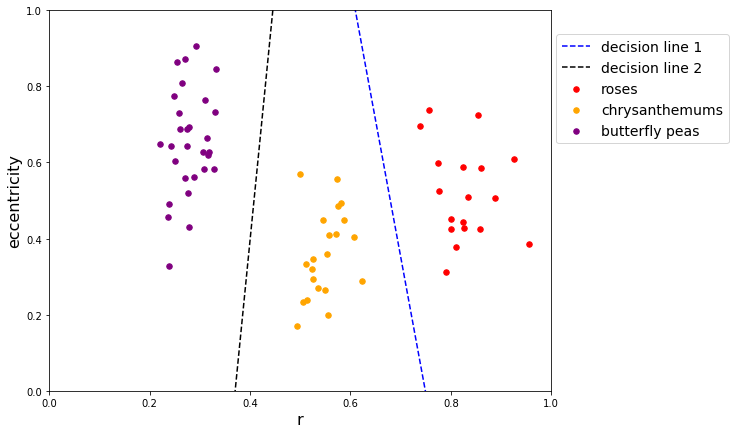

In [6]:
plt.figure(figsize=(9,7))

plt.scatter(roses['r'],roses['eccentricity'],c='red',s=30,label='roses')
plt.scatter(chrysanthemums['r'],chrysanthemums['eccentricity'],c='orange',s=30,label='chrysanthemums')
plt.scatter(butterfly_pea['r'],butterfly_pea['eccentricity'],c='purple',s=30,label='butterfly peas')
plt.plot(np.linspace(0,1),m1*np.linspace(0,1)+b1,'b--',label = 'decision line 1')
plt.plot(np.linspace(0,1),m2*np.linspace(0,1)+b2,'k--',label = 'decision line 2')
plt.ylabel('eccentricity',fontsize=16)
plt.xlabel('r',fontsize=16)
plt.legend(loc=(1.01,0.65),fontsize=14)
plt.xlim(0,1)
plt.ylim(0,1)
# plt.savefig('evsr_svm.png',dpi=300,bbox_inches='tight')
plt.show()